Anuj Karoddeo & Team \n

Minor Project \n

GHRIET Nagpur

In [90]:
#pip install librosa==0.9.1

In [150]:
import os

In [92]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [151]:
Root = "/content/gdrive/MyDrive/Colab Notebooks/speech-emotion-recognition-data"
os.chdir(Root) #used to change the current working directory to specified path

In [152]:
ls

Actor_01/  Actor_06/  Actor_11/  Actor_16/  Actor_21/
Actor_02/  Actor_07/  Actor_12/  Actor_17/  Actor_22/
Actor_03/  Actor_08/  Actor_13/  Actor_18/  Actor_23/
Actor_04/  Actor_09/  Actor_14/  Actor_19/  Actor_24/
Actor_05/  Actor_10/  Actor_15/  Actor_20/  modelForPrediction1.sav


In [153]:
import librosa #Python library for audio and music analysis
import soundfile
import os, glob, pickle #the glob module is used to retrieve files
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier #multi-layer perceptron (MLP) algorithm that trains using Backpropagation
from sklearn.metrics import accuracy_score

In [154]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel): #Mel-frequency cepstral coefficients (MFCCs) are a feature widely used in automatic speech and speaker recognition
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [155]:
# Emotions in the dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [156]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/gdrive/MyDrive/Colab Notebooks/speech-emotion-recognition-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [157]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

<ipython-input-154-138437059bc8>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-154-138437059bc8>:16: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-154-138437059bc8>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-154-138437059bc8>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e

In [158]:
x_train

array([[-5.94010986e+02,  5.55677528e+01,  1.06479979e+01, ...,
         1.12225796e-04,  1.36937582e-04,  6.45097898e-05],
       [-4.42078308e+02,  1.87135830e+01, -1.83509979e+01, ...,
         1.03909126e-03,  6.18079328e-04,  4.08284366e-04],
       [-5.70886841e+02,  3.89964867e+01, -1.10351896e+01, ...,
         9.98173346e-05,  9.29005546e-05,  5.99159139e-05],
       ...,
       [-4.47573944e+02,  1.98053379e+01, -8.72755718e+00, ...,
         2.82809895e-04,  1.67731327e-04,  9.88720640e-05],
       [-5.28273193e+02,  2.99813805e+01, -1.52440462e+01, ...,
         3.64804408e-04,  2.68893549e-04,  2.24908159e-04],
       [-6.02172119e+02,  4.49730186e+01, -7.10431433e+00, ...,
         3.52721981e-05,  2.54294519e-05,  1.54898808e-05]])

In [159]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [160]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [161]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [171]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [172]:
#Predict for the test set
y_pred=model.predict(x_test)

In [173]:
y_pred

array(['happy', 'calm', 'disgust', 'calm', 'fearful', 'happy', 'disgust',
       'happy', 'disgust', 'fearful', 'happy', 'happy', 'disgust',
       'happy', 'disgust', 'fearful', 'calm', 'disgust', 'disgust',
       'disgust', 'calm', 'happy', 'fearful', 'calm', 'calm', 'calm',
       'fearful', 'disgust', 'calm', 'calm', 'happy', 'fearful', 'happy',
       'fearful', 'disgust', 'calm', 'calm', 'disgust', 'calm', 'calm',
       'disgust', 'fearful', 'happy', 'calm', 'fearful', 'calm',
       'disgust', 'fearful', 'fearful', 'happy', 'happy', 'fearful',
       'fearful', 'calm', 'calm', 'disgust', 'fearful', 'disgust',
       'fearful', 'calm', 'fearful', 'calm', 'fearful', 'happy',
       'fearful', 'happy', 'happy', 'disgust', 'happy', 'calm', 'happy',
       'disgust', 'fearful', 'disgust', 'disgust', 'disgust', 'fearful',
       'happy', 'calm', 'fearful', 'disgust', 'calm', 'happy', 'disgust',
       'fearful', 'fearful', 'fearful', 'happy', 'disgust', 'fearful',
       'disgust', 

In [174]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.65%


In [138]:
from sklearn.metrics import accuracy_score, f1_score

In [109]:
f1_score(y_test, y_pred,average=None)

array([0.72916667, 0.71153846, 0.56910569, 0.54285714, 0.46753247,
       0.64150943])

In [110]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
0,calm,calm
1,calm,disgust
2,disgust,disgust
3,surprised,surprised
4,surprised,surprised
5,angry,angry
6,disgust,calm
7,fearful,fearful
8,fearful,fearful
9,disgust,disgust


In [111]:
df['Actual'].value_counts()

disgust      60
happy        53
calm         48
angry        45
fearful      42
surprised    40
Name: Actual, dtype: int64

In [ ]:
df['Actual'].value_counts()

<Axes: >

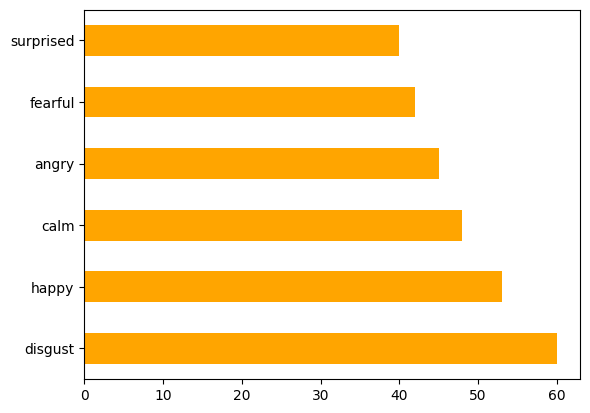

In [179]:
df['Actual'].value_counts().plot(kind='barh',color='orange')

<Axes: >

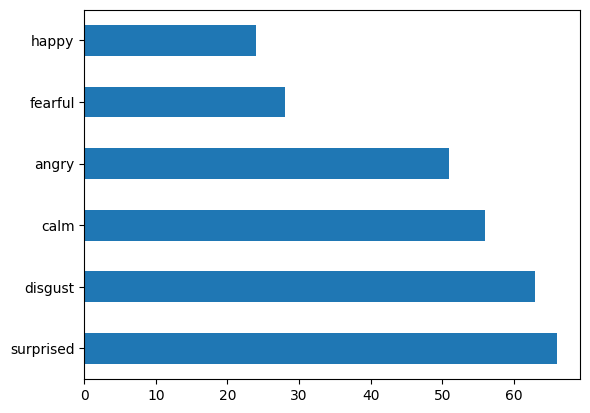

In [175]:
df['Predicted'].value_counts().plot(kind='barh')

In [113]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [114]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("/content/gdrive/MyDrive/Colab Notebooks/speech-emotion-recognition-data/Actor_17/03-01-02-02-01-02-17.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

<ipython-input-96-138437059bc8>:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


array(['calm'], dtype='<U9')

In [115]:
feature

array([[-6.66888123e+02,  7.19929581e+01,  1.46616507e+01,
         2.73175278e+01,  8.18679810e+00,  1.30045843e+01,
         4.66559649e+00, -8.98606002e-01,  3.41347194e+00,
         3.31013978e-01,  1.18141806e+00,  5.24112463e+00,
         5.68306386e-01,  3.26138043e+00, -1.00661242e+00,
         6.52355492e-01, -2.12107673e-01,  2.79908109e+00,
        -1.52994680e+00,  1.41159162e-01, -1.11000669e+00,
         7.71035314e-01, -1.25791535e-01,  1.01162207e+00,
        -2.28934073e+00, -9.77221549e-01, -2.17043257e+00,
        -4.08849865e-01, -5.69535434e-01,  1.21956301e+00,
         8.48254204e-01, -4.12033737e-01, -1.26124036e+00,
        -1.04136229e+00, -1.30589402e+00, -2.05986476e+00,
        -1.94764709e+00, -8.18767399e-02, -1.51282823e+00,
        -1.21325970e+00,  6.47156060e-01,  6.63299918e-01,
         6.78427279e-01,  6.74235582e-01,  7.11163342e-01,
         7.03210533e-01,  7.27637649e-01,  7.99109876e-01,
         7.83670247e-01,  7.86945760e-01,  7.76100338e-0